<a href="https://colab.research.google.com/github/bermudezfc/Deep-Learning/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [89]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [90]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [91]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [92]:
dataset.rename(columns={'rating': 'sentiment'}, inplace=True)

def convert_rating_to_sentiment(rating):
  if rating >= 3:
    return 1  # Positive
  else:
    return 0  # Negative

dataset['sentiment'] = dataset['sentiment'].apply(convert_rating_to_sentiment)

dataset.head()
dataset.info()
dataset['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1001 non-null   object
 1   sentiment  1001 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,count
sentiment,
1,621
0,380


## 1. Tokenize the data

In [93]:
vocab_size = 5000
oov_token = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(dataset['review'])

## 2. Sequence the data

In [94]:
sequences = tokenizer.texts_to_sequences(dataset['review'])


max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1001 non-null   object
 1   rating  1001 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## 3. Pad the data

In [95]:
max_length = 50
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

## 4. Train a sentiment model

In [96]:

X = padded_sequences
y = np.array(dataset['sentiment'])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=80, validation_data=(X_val, y_val))

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6364 - loss: 0.6820 - val_accuracy: 0.6219 - val_loss: 0.6682
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6124 - loss: 0.6645 - val_accuracy: 0.6219 - val_loss: 0.6649
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5966 - loss: 0.6646 - val_accuracy: 0.6219 - val_loss: 0.6585
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6295 - loss: 0.6424 - val_accuracy: 0.6219 - val_loss: 0.6481
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6167 - loss: 0.6394 - val_accuracy: 0.6219 - val_loss: 0.6343
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6233 - loss: 0.6185 - val_accuracy: 0.6219 - val_loss: 0.6172
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6770 - loss: 0.5723 - val_accuracy: 0.6716 - val_loss: 0.5920
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7256 - loss: 0.5483 - val_accuracy: 0.6716 - val_loss: 0.5578
Ep

## Get files for visualing the network

In [97]:


# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5000, 32)


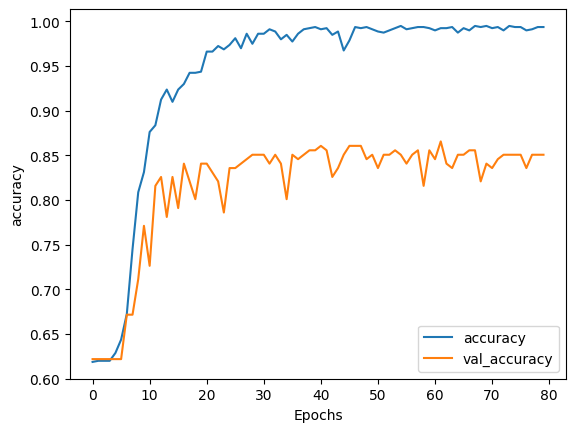

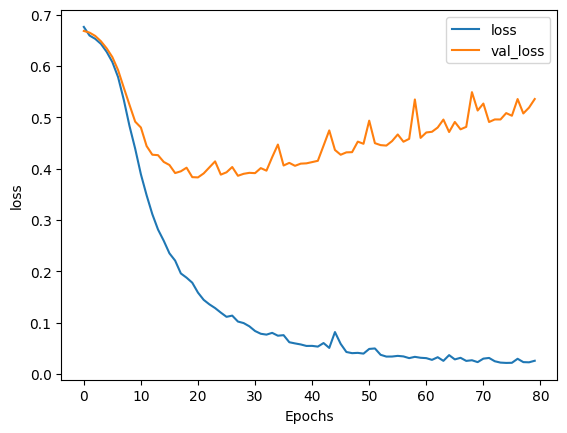

In [98]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [99]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5000, 32)


## 5. Predict sentiment with new reviews

In [115]:
new_reviews = [
    "antagal dumating ng order ko",
    "okay lang ung order ko",
    "ang good ng order ko",
    "maganda ang panget",
    "sexy ang mataba"
]

new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')

predictions = model.predict(new_padded)

for i, review in enumerate(new_reviews):
    sentiment = "Positive" if predictions[i] >= 0.5 else "Negative"
    print(f"Review: {review}\nSentiment: {sentiment} (Confidence: {predictions[i][0]:.2f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Review: antagal dumating ng order ko
Sentiment: Negative (Confidence: 0.02)

Review: okay lang ung order ko
Sentiment: Positive (Confidence: 0.55)

Review: ang good ng order ko
Sentiment: Positive (Confidence: 0.50)

Review: maganda ang panget
Sentiment: Negative (Confidence: 0.36)

Review: sexy ang mataba
Sentiment: Positive (Confidence: 0.86)

